In [69]:
import numpy as np
import pandas as pd
import neattext as nt
import texthero as hero
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Essayer différents encodages jusqu'à ce que le fichier soit lu correctement
# encodings = ['utf-8', 'latin-1', 'iso-8859-1']

# for encoding in encodings:
#     try:
#         # Charger le fichier TSV dans un DataFrame
#         df = pd.read_csv('test_set.tsv', sep='\t', encoding=encoding)

#         # Enregistrer le DataFrame dans un fichier CSV
#         df.to_csv('test_set.csv', index=False)

#         print(f"Le fichier a été lu avec succès avec l'encodage : {encoding}")
#         break  # Sortir de la boucle si la lecture réussit

#     except UnicodeDecodeError:
#         print(f"Échec de la lecture avec l'encodage : {encoding}")

### Data processing

In [71]:
data = pd.read_excel("training_set.xls")

In [72]:
df_copy = data.copy()

In [73]:
df_copy.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_copy.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [75]:
df = df_copy[["essay_id", "essay_set", "essay", "rater1_domain1", "rater2_domain1", "domain1_score"]]

In [76]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [77]:
df.fillna(0, inplace=True)  

C:\Users\Dieu_Merci\AppData\Local\Temp\ipykernel_2512\946135890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [78]:
df.isnull().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
domain1_score     0
dtype: int64

In [79]:
df.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,35.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,32.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0
12977,21633,8,Many people believe that laughter can improve...,20.0,20.0,40.0


In [80]:
df.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1    float64
rater2_domain1    float64
domain1_score     float64
dtype: object

In [81]:
df.isnull().sum().to_frame("Null values")

,Null values
essay_id,0
essay_set,0
essay,0
rater1_domain1,0
rater2_domain1,0
domain1_score,0


In [82]:
df.shape

(12978, 6)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12978 non-null  float64
 4   rater2_domain1  12978 non-null  float64
 5   domain1_score   12978 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.5+ KB


In [84]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12978.000000,12978.000000,12978.000000,12978.000000,12978.000000
mean,10295.432809,4.179458,4.126522,4.136770,6.799199
std,6308.588616,2.136749,4.212531,4.264311,8.970411
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4439.250000,2.000000,2.000000,2.000000,2.000000
50%,10045.500000,4.000000,3.000000,3.000000,3.000000
75%,15680.750000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


In [85]:
set(df["essay_set"])

{1, 2, 3, 4, 5, 6, 7, 8}

In [86]:
set(df["domain1_score"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 55.0,
 60.0}

In [87]:
df["domain1_score"].value_counts()

domain1_score
3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      420
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
40.0     161
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
20.0     103
24.0      99
5.0       96
19.0      88
15.0      86
13.0      82
21.0      70
36.0      65
22.0      63
23.0      53
30.0      49
35.0      47
37.0      39
34.0      39
32.0      37
31.0      34
33.0      32
45.0      31
42.0      23
41.0      22
38.0      20
43.0      15
44.0      14
50.0      13
46.0      13
28.0      11
39.0       8
29.0       8
47.0       7
27.0       6
25.0       5
26.0       4
48.0       3
55.0       2
49.0       2
60.0       1
Name: count, dtype: int64

In [88]:
round(df["domain1_score"].value_counts(normalize=True) * 100, 2)

domain1_score
3.0     21.81
2.0     18.84
1.0     13.38
4.0     10.97
8.0      5.68
0.0      3.24
9.0      2.95
10.0     2.87
16.0     1.53
11.0     1.27
7.0      1.26
40.0     1.24
17.0     1.23
6.0      1.06
12.0     1.02
18.0     0.91
14.0     0.81
20.0     0.79
24.0     0.76
5.0      0.74
19.0     0.68
15.0     0.66
13.0     0.63
21.0     0.54
36.0     0.50
22.0     0.49
23.0     0.41
30.0     0.38
35.0     0.36
37.0     0.30
34.0     0.30
32.0     0.29
31.0     0.26
33.0     0.25
45.0     0.24
42.0     0.18
41.0     0.17
38.0     0.15
43.0     0.12
44.0     0.11
50.0     0.10
46.0     0.10
28.0     0.08
39.0     0.06
29.0     0.06
47.0     0.05
27.0     0.05
25.0     0.04
26.0     0.03
48.0     0.02
55.0     0.02
49.0     0.02
60.0     0.01
Name: proportion, dtype: float64

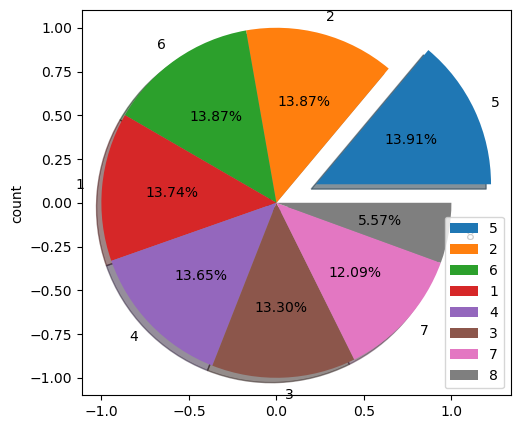

In [89]:
explode = [0.25, 0, 0, 0, 0, 0, 0, 0]

df["essay_set"].value_counts().plot.pie(figsize=(7, 5), autopct="%.2f%%", shadow=True, frame=True, explode=explode).legend();

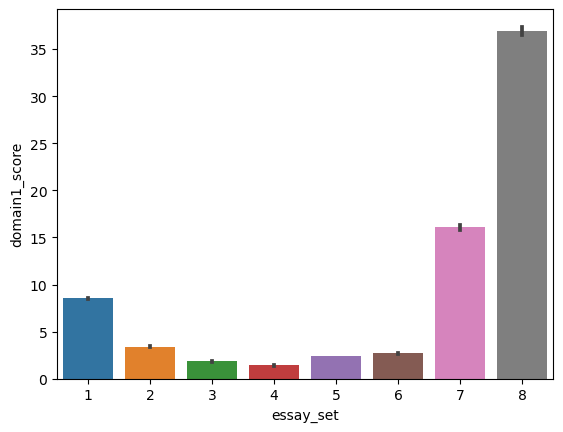

In [90]:
sns.barplot(x=df["essay_set"], y=df["domain1_score"]);

In [91]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'domain1_score'],
      dtype='object')

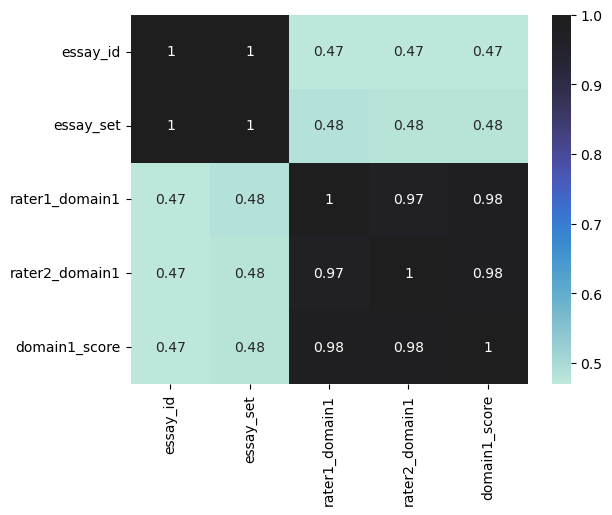

In [92]:
sns.heatmap(df[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1', 'domain1_score']].corr(), annot=True, center=True);

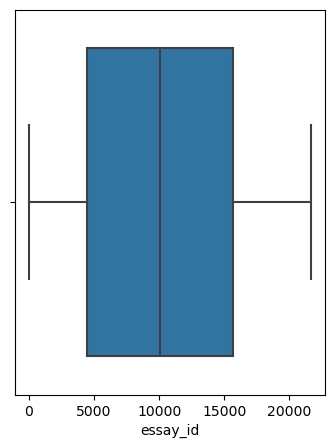

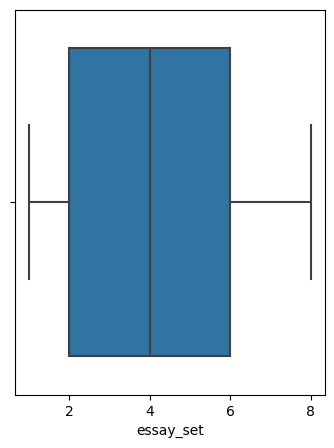

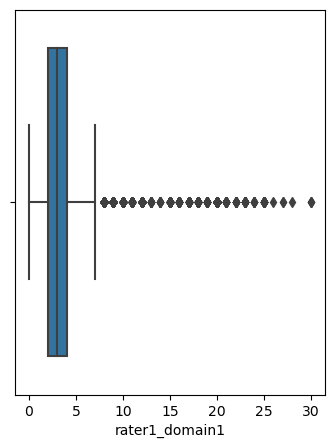

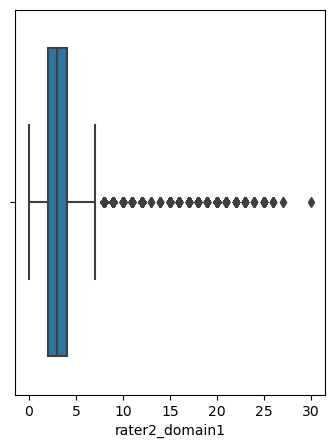

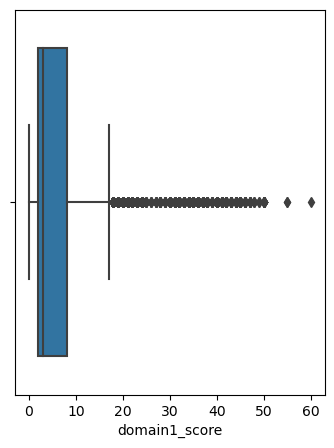

In [93]:
df_outliers = df[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1','domain1_score']]

for i in df_outliers.columns:
    plt.figure(figsize=(4, 5));
    sns.boxplot(x=df_outliers[i]);

In [94]:
df_outliers["rater2_domain1"] = np.log(df_outliers["rater2_domain1"])

C:\Users\Dieu_Merci\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Dieu_Merci\AppData\Local\Temp\ipykernel_2512\1724470679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers["rater2_domain1"] = np.log(df_outliers["rater2_domain1"])


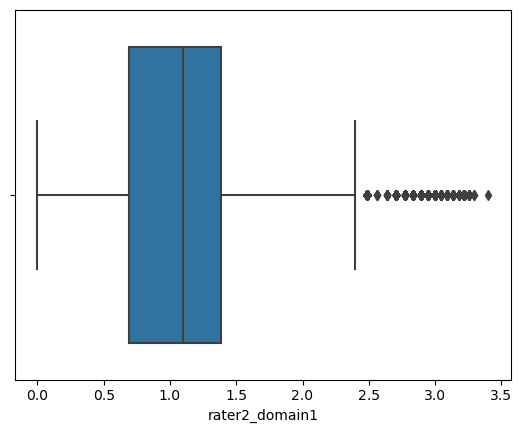

In [95]:
sns.boxplot(x=df_outliers["rater2_domain1"]);

In [110]:
rater2_domain1_outliers = (df_outliers[df_outliers["rater2_domain1"] > df_outliers["rater2_domain1"].quantile(0.75)])

In [111]:
rater2_domain1_outliers.shape

(2832, 5)

In [112]:
rater2_domain1_outliers.count()

essay_id          2832
essay_set         2832
rater1_domain1    2832
rater2_domain1    2832
domain1_score     2832
dtype: int64

In [113]:
dt = pd.DataFrame(np.log(rater2_domain1_outliers))

C:\Users\Dieu_Merci\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [114]:
dt

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
3,1.386294,0.000000,1.609438,0.475885,2.302585
6,1.945910,0.000000,1.609438,0.475885,2.302585
7,2.079442,0.000000,1.609438,0.475885,2.302585
8,2.197225,0.000000,1.386294,0.475885,2.197225
15,2.772589,0.000000,1.791759,0.583198,2.484907
...,...,...,...,...,...
12973,9.981652,2.079442,2.833213,1.061385,3.555348
12974,9.981744,2.079442,2.708050,1.041412,3.465736
12975,9.981790,2.079442,2.995732,1.181143,3.688879
12976,9.981837,2.079442,2.995732,1.097189,3.688879


In [115]:
df_perfect = (df_outliers[df_outliers["rater2_domain1"] < df_outliers["rater2_domain1"].quantile(0.75)])

In [116]:
df_perfect.shape

(7820, 5)

In [121]:
df_final = pd.concat([df_perfect, dt], axis=0)

In [122]:
df_final

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
12973,9.981652,2.079442,2.833213,1.061385,3.555348
12974,9.981744,2.079442,2.708050,1.041412,3.465736
12975,9.981790,2.079442,2.995732,1.181143,3.688879
12976,9.981837,2.079442,2.995732,1.097189,3.688879


In [68]:
df_outliers["rater2_domain1"] = np.log(Q3)

C:\Users\Dieu_Merci\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


ValueError: Columns must be same length as key

In [26]:
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_clean_outliers = df[(df_outliers >= lower_bound) & (df_outliers <= upper_bound)]

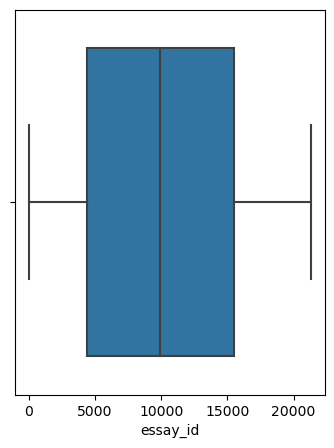

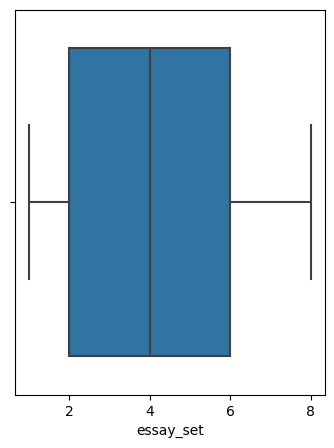

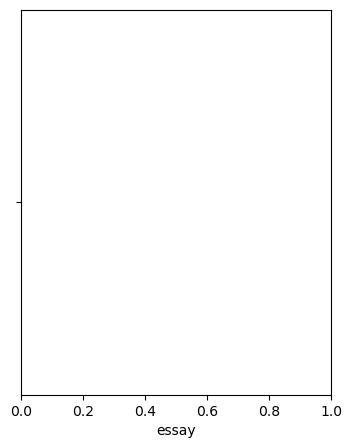

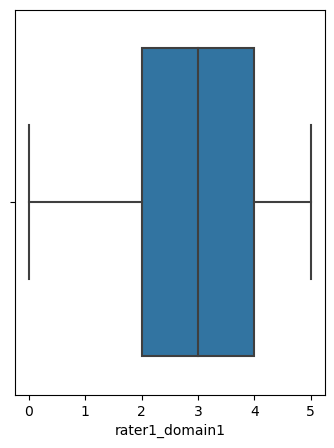

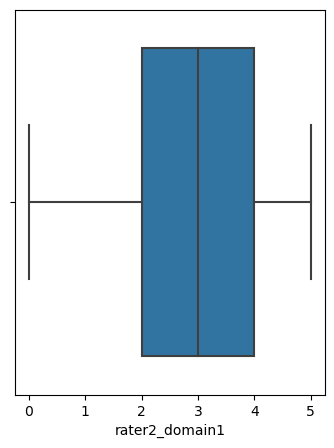

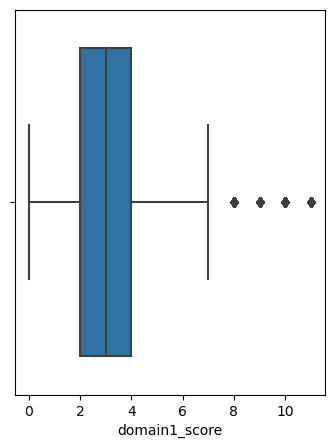

In [27]:
for j in df_clean_outliers.columns:
    plt.figure(figsize=(4, 5));
    sns.boxplot(x=df_clean_outliers[j]);

In [28]:
df_clean_outliers.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12728.000000,12978.000000,10829.000000,10850.000000,10908.000000
mean,10075.992222,4.179458,2.592760,2.592719,3.495875
std,6170.892304,2.136749,1.298392,1.305745,2.659366
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4376.750000,2.000000,2.000000,2.000000,2.000000
50%,9920.500000,4.000000,3.000000,3.000000,3.000000
75%,15493.250000,6.000000,4.000000,4.000000,4.000000
max,21301.000000,8.000000,5.000000,5.000000,11.000000


In [29]:
df_clean_outliers.isnull().sum()

essay_id            250
essay_set             0
essay             12978
rater1_domain1     2149
rater2_domain1     2128
domain1_score      2070
dtype: int64

In [30]:
df_clean_outliers.shape

(12978, 6)

In [31]:
df_clean_outliers.std()

essay_id          6170.892304
essay_set            2.136749
essay                     NaN
rater1_domain1       1.298392
rater2_domain1       1.305745
domain1_score        2.659366
dtype: object

In [32]:
df1 = df_clean_outliers.copy()

In [34]:
dt = df_outliers[df_outliers["rater2_domain1"] > 19]

In [36]:
dt.index

Index([12256, 12257, 12258, 12261, 12263, 12264, 12269, 12271, 12272, 12274,
       ...
       12954, 12959, 12960, 12961, 12962, 12963, 12970, 12975, 12976, 12977],
      dtype='int64', length=333)

In [51]:
text_data = nt.TextFrame(str(data))
text_data.describe()

Key      Value          
Length  : 1333           
vowels  : 144            
consonants: 231            
stopwords: 33             
punctuations: 71             
special_char: 71             
tokens(whitespace): 147            
tokens(words): 142            


In [52]:
text_data.bow()

Counter({'1': 7,
         'CAPS1': 5,
         '8': 5,
         'Dear': 4,
         'I': 3,
         'have': 3,
         'to': 3,
         '4': 3,
         '0': 2,
         '2383': 2,
         'that': 2,
         'a': 2,
         '2384': 2,
         '2': 2,
         '2385': 2,
         '3': 2,
         '2386': 2,
         'CAPS2': 2,
         'my': 2,
         '2387': 2,
         'people': 2,
         '4249': 2,
         '4250': 2,
         'the': 2,
         '4251': 2,
         '4252': 2,
         '4253': 2,
         'essay_id': 1,
         'essay_set': 1,
         'essay': 1,
         'believe': 1,
         'computers': 1,
         'positive': 1,
         'effec': 1,
         'know': 1,
         'some': 1,
         'problems': 1,
         'came': 1,
         'up': 1,
         'whom': 1,
         'it': 1,
         'MONTH1': 1,
         'concern': 1,
         'Computers': 1,
         'are': 1,
         'CAPS3': 1,
         'has': 1,
         'come': 1,
         'atte': 1,
         'Loc

In [53]:
text_data.memory_usage()

{'memory': 1382, 'human_readable': '1.35 KB'}

In [54]:
text_data.word_stats()

{'Length of Text': 1333,
 'Num of Vowels': 144,
 'Num of Consonants': 231,
 'Num of Stopwords': 33,
 'Stats of Vowels': {'a': 39, 'e': 44, 'i': 23, 'o': 32, 'u': 6},
 'Stats of Consonants': {'b': 4,
  'c': 23,
  'd': 10,
  'f': 5,
  'g': 7,
  'h': 14,
  'j': 1,
  'k': 2,
  'l': 10,
  'm': 15,
  'n': 19,
  'p': 22,
  'q': 0,
  'r': 18,
  's': 32,
  't': 30,
  'v': 6,
  'w': 5,
  'x': 1,
  'y': 7,
  'z': 0}}

In [55]:
text_data.term_freq()

{'essay_id': 0.14285714285714285,
 'essay_set': 0.14285714285714285,
 'essay': 0.14285714285714285,
 '\\': 0.14285714285714285,
 '0': 0.2857142857142857,
 '2383': 0.2857142857142857,
 '1': 1.0,
 'I': 0.42857142857142855,
 'believe': 0.14285714285714285,
 'computers': 0.14285714285714285,
 'positive': 0.14285714285714285,
 'effec...': 0.14285714285714285,
 '2384': 0.2857142857142857,
 'Dear': 0.5714285714285714,
 '@CAPS1,': 0.14285714285714285,
 'know': 0.14285714285714285,
 'problems': 0.14285714285714285,
 'came': 0.14285714285714285,
 'up...': 0.14285714285714285,
 '2': 0.2857142857142857,
 '2385': 0.2857142857142857,
 '@MONTH1': 0.14285714285714285,
 'concern,': 0.14285714285714285,
 'Computers': 0.14285714285714285,
 'are...': 0.14285714285714285,
 '3': 0.2857142857142857,
 '2386': 0.2857142857142857,
 '@CAPS1': 0.5714285714285714,
 '@CAPS2,': 0.14285714285714285,
 '@CAPS3': 0.14285714285714285,
 'come': 0.14285714285714285,
 'atte...': 0.14285714285714285,
 '4': 0.4285714285714285

In [56]:
data_clean = text_data.clean_text()
data_clean

'      essayid  essayset                                              essay             i believe that computers have a positive effec     dear caps i know some problems have came up     dear to whom it month concern computers are     dear caps caps caps has come to my atte     dear local newspaper i think that people have                                                                        just one caps caps can bring people togeth      caps was my first time going to the band ca     laughter is one of the most important things i                                     a caps of c       good caps in location  every year a sel         domainpredictionid                                                                  rows x  columns'

In [57]:
data_c = pd.Series(data_clean)
data_c

0          essayid  essayset                       ...
dtype: object

In [61]:
data_c_to_numeric = hero.tfidf(data_c)

In [62]:
data_c_to_numeric

0    [0.2041241452319315, 0.06804138174397717, 0.06...
dtype: object

In [ ]:
# OPCO qui paye la formation des étudiants en alternance